In [41]:
#Validacion cruzada. Tomar 80% del dataframe para hacer el entrenamiento y 20% para hacer la validacion y medir el error que da
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("Advertising.csv")
df_train = df.iloc[:160]
df_test = df.iloc[160:200]

# Definir variables predictoras y target
X_train = df_train.drop('sales', axis=1)
y_train = df_train['sales']

X_test = df_test.drop('sales', axis=1)
y_test = df_test['sales']

# Entrenar el modelo predictivo y hacer un DataFrame de predicciones
arbol = DecisionTreeRegressor()
arbol.fit(X_train, y_train)
y_pred = arbol.predict(X_test)

error = y_pred - y_test
mae = error.abs().mean()

print(mae)

0.86


Validación cruzada

Utilizando el conjunto de datos Advertising.csv y el modelo de árbol de decisión
1. Para cada nivel de max_depth=1:13, hacer una validación cruzada.
2. Hacer una gráfica 

/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


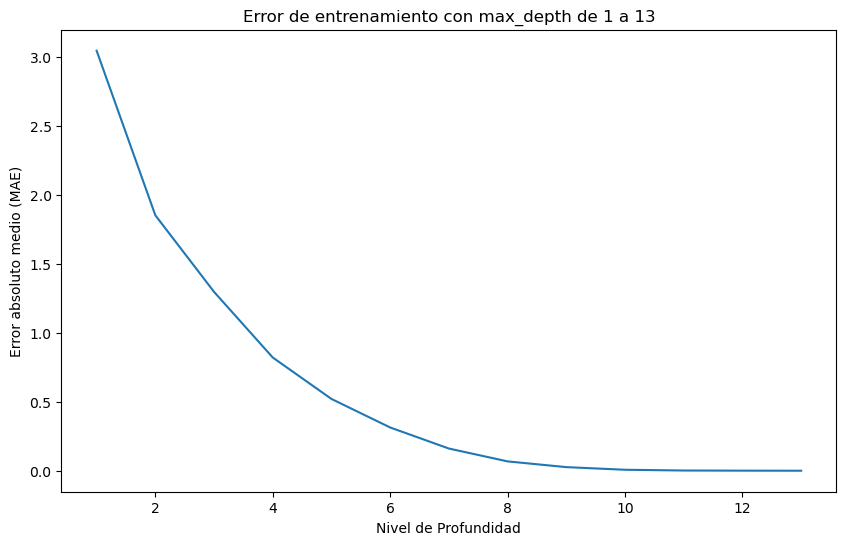

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("Advertising.csv")

# Definir variables predictoras y target
X = df.drop('sales', axis=1)
y = df['sales']

# Entrenar el modelo predictivo y hacer un DataFrame de predicciones
arbol = DecisionTreeRegressor()
arbol.fit(X, y)
y_pred = arbol.predict(X)

# Calcular el error de entrenamiento con max_depth de 1 a 13 y guardarlo en un DataFrame
resultados = []
for i in range(1, 14):
    arbol = DecisionTreeRegressor(max_depth=i)
    arbol.fit(X, y)
    y_pred = arbol.predict(X)
    mae =  mean_absolute_error(y, y_pred)
    resultados.append({'rango': i, 'MAE': mae})

df_mae = pd.DataFrame(resultados)

# Crear la gráfica utilizando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mae, x='rango', y='MAE')
plt.title('Error de entrenamiento con max_depth de 1 a 13')
plt.xlabel('Nivel de Profundidad')
plt.ylabel('Error absoluto medio (MAE)')
plt.show()

KNN (K Nearest Neighbours)

Crear una función para hacer predicciones basadas en kNN. Es decir, dada una nueva observacion, buscar dentro de un conjunto de datos las k filas mas similares y predecir su output
La función recibe los siguientes argumentos: X, y, k, new_x
X - inputs
y - outputs
k - número de vecinos
new_x - nueva observación

In [43]:
# EJERCICIO ADICIONAL
# K Nearest Neighbors manual
import pandas as pd
import numpy as np

# Funcion knn, recibe X el set de Inputs, y el set de Outputs, k el numero de vecinos a considerar y new_x es la observacion o vector a buscar en X. 
# Regresa el valor promedio de venta de las k vecinos mas cercanos a esa observacion
def KNN_Manual(X, y, k, new_x):
    #Calcular distancias y guardarlas en un dataframe
    distancias = np.sqrt(np.sum((X - new_x)**2, axis=1))
    
    # Obtener índices de los k vecinos más cercanos
    indices = distancias.argsort()[:k]
    
    # Calcular la media de las salidas de los k vecinos más cercanos
    prediccion = y.iloc[indices].mean()

    return prediccion

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("Advertising.csv")
df = df.drop('Unnamed: 0', axis=1)

# Dividir datos en características (X) y variable objetivo (y)
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Pedir al usuario que introdusca valores para busqueda y cuantos vecinos tomar en cuenta
tv = 45.7
radio = 12.5
newspaper = 63.2
k = 5

# predecir resultado
new_x = {'TV': tv, 'radio': radio, 'newspaper': newspaper}
ventas_prom = KNN_Manual(X, y, k, new_x)
print("las ventas estimadas con ese nivel de gasto en publicidad son de:", ventas_prom)




las ventas estimadas con ese nivel de gasto en publicidad son de: 9.040000000000001


Entrenamiento de modelo knn con el KNeighboursRegressor

In [44]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

# Definir variables predictoras y target
df = pd.read_csv('advertising.csv')
df = df.drop('Unnamed: 0', axis=1)
X = df.drop('sales', axis=1)
y = df['sales']

# Entrenar el modelo
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X, y)

test = []
tv = 230.1
radio = 37.8
newspaper = 69.2
test.append({'TV': tv, 'radio': radio, 'newspaper': newspaper})

tv = 45.7
radio = 12.5
newspaper = 63.2
test.append({'TV': tv, 'radio': radio, 'newspaper': newspaper})

X_test = pd.DataFrame(test)

# Realizar predicciones sobre el conjunto de prueba
predictions = knn.predict(X_test)
print(predictions)


[20.28  9.04]


Variaciones de la validación cruzada I

Imaginad que queremos entender la diferencia entre evaluar con el train o con el test
1. Para cada nivel de profundidad, entrenad con el train y evaluad también con el conjunto de train. Este proceso debería hacer overfitting.
2. Juntad la curva del train con la del test en una misma gráfica

/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

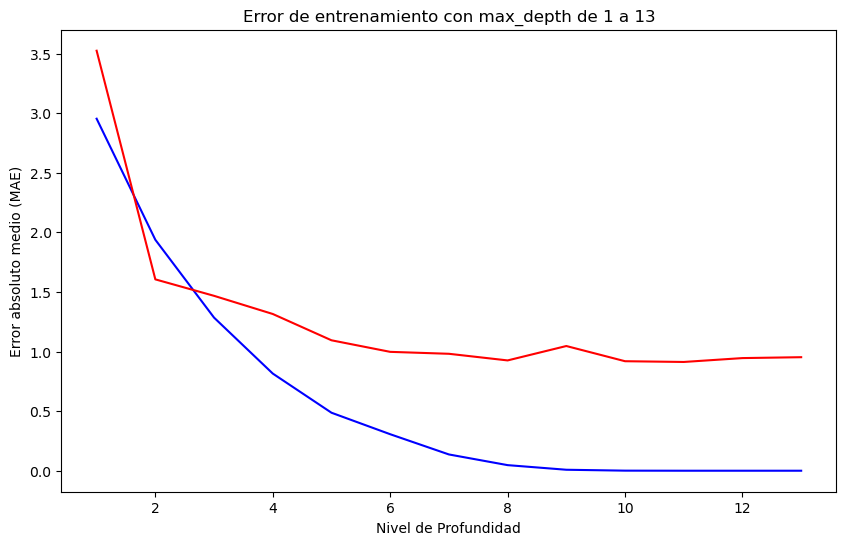

In [45]:
#Hacer la validacion cruzada para max_depth de 1 a 14 y graficar con un % al azar de las filas
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("Advertising.csv")
porcentaje = 0.8  # 80%

df_train = df.sample(frac=porcentaje)
df_test = df.drop(df_train.index)

# Definir variables predictoras y target
X_train = df_train.drop('sales', axis=1)
y_train = df_train['sales']

X_test = df_test.drop('sales', axis=1)
y_test = df_test['sales']

# Calcular el error de entrenamiento con max_depth de 1 a 13 y guardarlo en un DataFrame
resultados_train = []
resultados_test = []
for i in range(1, 14):
    arbol = DecisionTreeRegressor(max_depth=i)
    arbol.fit(X_train, y_train)
    y_pred_test = arbol.predict(X_test)
    y_pred_train = arbol.predict(X_train)
    error_test = y_pred_test - y_test
    error_train = y_pred_train - y_train
    mae_test = error_test.abs().mean()
    mae_train = error_train.abs().mean()
    resultados_test.append({'Max_Depth': i, 'MAE': mae_test})
    resultados_train.append({'Max_Depth': i, 'MAE': mae_train})

df_mae_train = pd.DataFrame(resultados_train)
df_mae_test = pd.DataFrame(resultados_test)

# Crear la gráfica utilizando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mae_train, x='Max_Depth', y='MAE', color='blue')
sns.lineplot(data=df_mae_test, x='Max_Depth', y='MAE', color='red')
plt.title('Error de entrenamiento con max_depth de 1 a 13')
plt.xlabel('Nivel de Profundidad')
plt.ylabel('Error absoluto medio (MAE)')
plt.show()

#print(df_mae_test)



Variaciones de la validación cruzada II

Imaginaos que queremos saber si es mejor utiliar kNN o decision trees.
1. Repetid el ejercicio anterior utilizando knn (con un rango de k que os parezca razonable).
2. ¿Qué modelo deberíamos utilizar y con qué hyperparámetro?

In [46]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Regresa el valor promedio de venrta de las k vecinos mas cercanos a esa observacion
def KNN_Manual(X, y, k, new_x):
    #Calcular distancias y guardarlas en un dataframe
    distancias = np.sqrt(np.sum((X - new_x)**2, axis=1))
    
    # Obtener índices de los k vecinos más cercanos
    indices = distancias.argsort()[:k]
    
    # Calcular la media de las salidas de los k vecinos más cercanos
    prediccion = y.iloc[indices].mean()

    return prediccion

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("Advertising.csv")

# Dividir el conjujto de datos en train y test
porcentaje = 0.8  # 80%
df_train = df.sample(frac=porcentaje)
df_test = df.drop(df_train.index)

# Definir variables predictoras y target
X_train = df_train.drop('sales', axis=1)
y_train = df_train['sales']

X_test = df_test.drop('sales', axis=1)
y_test = df_test['sales']

# Entrenar y hacer validacion cruzada con arboles de deciscion y max depth 1 al 13
resultados_arboles = []
for i in range(1, 14):
    arbol = DecisionTreeRegressor(max_depth=i)
    arbol.fit(X_train, y_train)
    y_pred_test = arbol.predict(X_test)
    error_test = y_pred_test - y_test
    mae_test = error_test.abs().mean()
    resultados_arboles.append({'Max_Depth': i, 'MAE': mae_test})

# Convertir a dataframe
df_mae_arboles = pd.DataFrame(resultados_arboles)

# Determinar el MAE del modelo con arboles de descicion
Max_Depth_Optimo = df_mae_arboles.loc[df_mae_arboles['MAE'].idxmin()]['Max_Depth']
MAE_Arboles = df_mae_arboles.loc[df_mae_arboles['MAE'].idxmin()]['MAE']


# Sacar KNN en el Test con k del 1 al 10 y determinar el error y k optimos
# Inicializar un diccionario para almacenar los resultados de MAE para cada valor de k
resultados_mae = {}

# Iterar sobre los valores de k de 1 a 10
for k in range(1, 11):
    # Inicializar una lista para almacenar las predicciones para el valor de k actual
    y_test_pred_knn = []
    
    # Iterar sobre las filas del DataFrame X_test
    for index, row in X_test.iterrows():
        # Llamar a la función KNN_Manual para obtener la predicción con el valor de k actual
        prediccion = KNN_Manual(X_train, y_train, k, row)
        
        # Guardar la predicción en la lista y_test_pred_knn
        y_test_pred_knn.append(prediccion)
    
    # Convertir la lista de predicciones en un DataFrame
    y_test_pred_knn = pd.DataFrame(y_test_pred_knn, columns=['sales'])
    
    # Calcular el error absoluto medio (MAE) entre y_test y y_test_pred_knn
    error_absoluto = np.abs(y_test - y_test_pred_knn['sales'])
    mae_knn = error_absoluto.mean()
    
    # Guardar el MAE en el diccionario de resultados
    resultados_mae[k] = mae_knn

# Convertir el diccionario de resultados en un DataFrame
df_resultados_mae = pd.DataFrame(resultados_mae.items(), columns=['K', 'MAE'])

# Encontrar el valor de k que minimiza el MAE
k_optimo = df_resultados_mae.loc[df_resultados_mae['MAE'].idxmin()]['K']
mae_optimo = df_resultados_mae.loc[df_resultados_mae['MAE'].idxmin()]['MAE']

print("Valor óptimo de k:", k_optimo)
print("MAE mínimo correspondiente:", mae_optimo)

print(f"Con arboles de descicion:\nEl nivel de profundidad optimo es {Max_Depth_Optimo} y el MAE alcanzado es {MAE_Arboles}")



Valor óptimo de k: 2.0
MAE mínimo correspondiente: 6.874999999999999
Con arboles de descicion:
El nivel de profundidad optimo es 10.0 y el MAE alcanzado es 0.8474999999999998


Variaciones de la validación cruzada III

Validación cruzada aleatoria: En vez de separar el train y test cogiendo los primero y últimos datos, crear el train escogiendo el 80% de filas al azar, y el test como las filas restantes.
Para cada hyperparámetro, repetir el proceso k veces (5 o 10), y calcular el resultado de la validación cruzada como el promedio de las validaciones cruzadas de cada una de las veces.
Implementad esta variación con los decision trees y hacer y hacer las graficas correspondientes.

/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

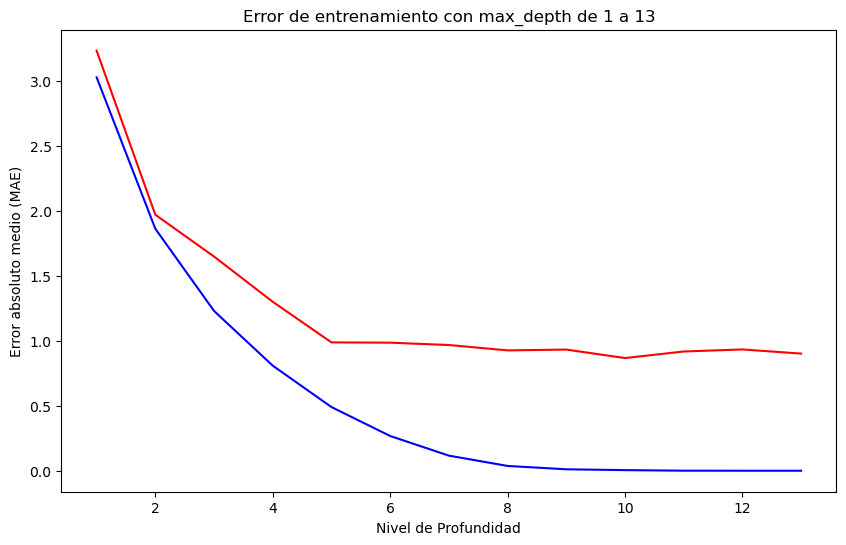

Nivel de profundidad óptimo encontrado: 10.0


In [47]:
#Hacer 10 pliegues para cada nivel de profundidad y sacar el error promedio por pliegue
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("Advertising.csv")
porcentaje = 0.8  # 80%
n = 10  # 10 splits diferentes por cada nivel de profundidad

resultados_train = []
resultados_test = []
for i in range(1, 14):
    mae_train_per_depth = []
    mae_test_per_depth = []

    for j in range(n):
        #selecciona al azar el train y el test
        df_train = df.sample(frac=porcentaje)
        df_test = df.drop(df_train.index)

        #inicializa las variables
        X_train = df_train.drop('sales', axis=1)
        X_test = df_test.drop('sales', axis=1)

        y_train = df_train['sales']
        y_test = df_test['sales']

        #entrena el arbol
        arbol = DecisionTreeRegressor(max_depth=i)
        arbol.fit(X_train, y_train)

        #predecir el arbol en el conjunto de prueba y en el de engtrenamiento
        y_pred_test = arbol.predict(X_test)
        y_pred_train = arbol.predict(X_train)

        #calcular error para este split en la profundidad i
        mae_train_split = np.mean(np.abs(y_pred_train - y_train))
        mae_test_split = np.mean(np.abs(y_pred_test - y_test))
        
        # Almacenar MAE de este split
        mae_train_per_depth.append(mae_train_split)
        mae_test_per_depth.append(mae_test_split)

    # Calcular el MAE Promedio por profundidad de los n splits evaluados
    avg_mae_train = np.mean(mae_train_per_depth)
    avg_mae_test = np.mean(mae_test_per_depth)

    resultados_test.append({'Max_Depth': i, 'MAE': avg_mae_test})
    resultados_train.append({'Max_Depth': i, 'MAE': avg_mae_train})

df_mae_train = pd.DataFrame(resultados_train)
df_mae_test = pd.DataFrame(resultados_test)

# Crear la gráfica utilizando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mae_train, x='Max_Depth', y='MAE', color='blue')
sns.lineplot(data=df_mae_test, x='Max_Depth', y='MAE', color='red')
plt.title('Error de entrenamiento con max_depth de 1 a 13')
plt.xlabel('Nivel de Profundidad')
plt.ylabel('Error absoluto medio (MAE)')
plt.show()

optimal_depth = df_mae_test.loc[df_mae_test['MAE'].idxmin()]['Max_Depth']
print(f"Nivel de profundidad óptimo encontrado: {optimal_depth}")

Variaciones de la validación cruzada IV

K-fold cross validation: en vez de coger el train y test al azar, escogerlos haciendo k bloques distintos en los que vas iternado sobre cada bloque
Implementad esta variación con los decision trees y hacer las gráficas correspondientes.

/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

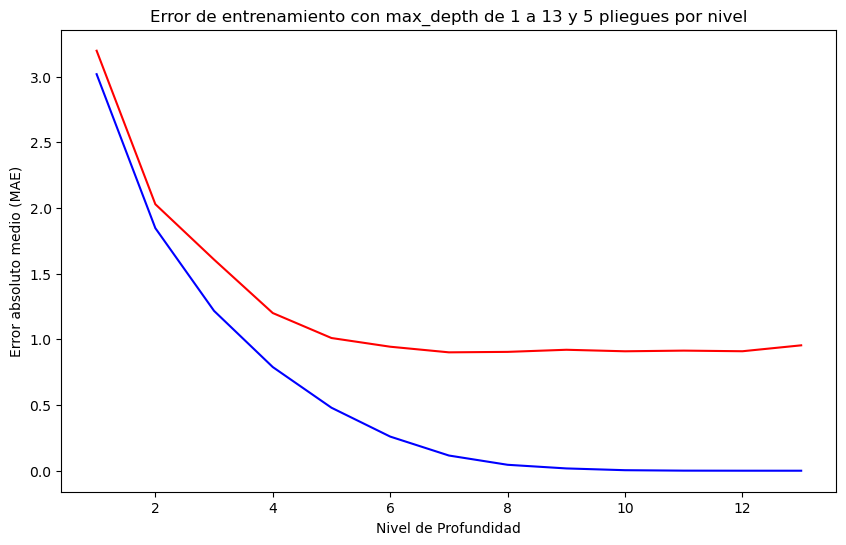

In [48]:
# Hacer k fold cross validation con Arboles de Desicion, dividir el data set en 5 pliegues
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("Advertising.csv")

# numero de pliegues y longitud de la matriz de datos, se puede hacer asi por que x % k = 0 
k = 5
x = len(df)
elementos = x/k

# Inicializar listas
resultados_train_fold = []
resultados_test_fold = []


# Iteramos sobre la profundidad maxima del 1 al 13
for i in range(1,14):   
    # Inicialzar Variables
    resultados_train = []
    resultados_test = []
    df_mae_train = []
    df_mae_test = []

    # Iterar por pliegue 
    for j in range(0, k):  
        # Determinar los indices para hacer los cortes
        indice_de = int(elementos * (j+1) - elementos)
        indice_a = int(elementos * (j+1)) 
        
        #Hacer Pliegue
        df_test = df.iloc[indice_de:indice_a]
        df_train = df.drop(df_test.index)

         # Definir variables predictoras y target
        X_train = df_train.drop('sales', axis=1)
        y_train = df_train['sales']
        X_test = df_test.drop('sales', axis=1)
        y_test = df_test['sales']

        #Generar arboles por pliegue y depth
        arbol = DecisionTreeRegressor(max_depth=i)
        arbol.fit(X_train, y_train)
        y_pred_test = arbol.predict(X_test)
        y_pred_train = arbol.predict(X_train)

        #Calcular el error por pliegue y depth
        error_test = y_pred_test - y_test
        error_train = y_pred_train - y_train
        mae_test = error_test.abs().mean()
        mae_train = error_train.abs().mean()

        #Agregar resultados a lista
        resultados_test.append({'Max_Depth': i, 'Fold': j, 'MAE': mae_test})
        resultados_train.append({'Max_Depth': j, 'Fold': j,  'MAE': mae_train})

    # Convierte la lista a dataframe
    df_mae_train = pd.DataFrame(resultados_train)
    df_mae_test = pd.DataFrame(resultados_test)

    # Calcula el mae promedio de los pliegues y lo agrega a una nueva lista
    resultados_train_fold.append({'Max_Depth': i, 'Avg_MAE': df_mae_train['MAE'].mean()})
    resultados_test_fold.append({'Max_Depth': i, 'Avg_MAE': df_mae_test['MAE'].mean()})

# Convierte la lista en dataframe
df_resultados_train_fold = pd.DataFrame(resultados_train_fold)    
df_resultados_test_fold = pd.DataFrame(resultados_test_fold)    

# Crear la gráfica utilizando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_resultados_train_fold, x='Max_Depth', y='Avg_MAE', color='blue')
sns.lineplot(data=df_resultados_test_fold, x='Max_Depth', y='Avg_MAE', color='red')
plt.title(f'Error de entrenamiento con max_depth de 1 a 13 y {k} pliegues por nivel')
plt.xlabel('Nivel de Profundidad')
plt.ylabel('Error absoluto medio (MAE)')
plt.show()


Hacer el modelo con Random Forest y Boosting

Comparar cual es el metodo mas preciso.

/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/EAE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

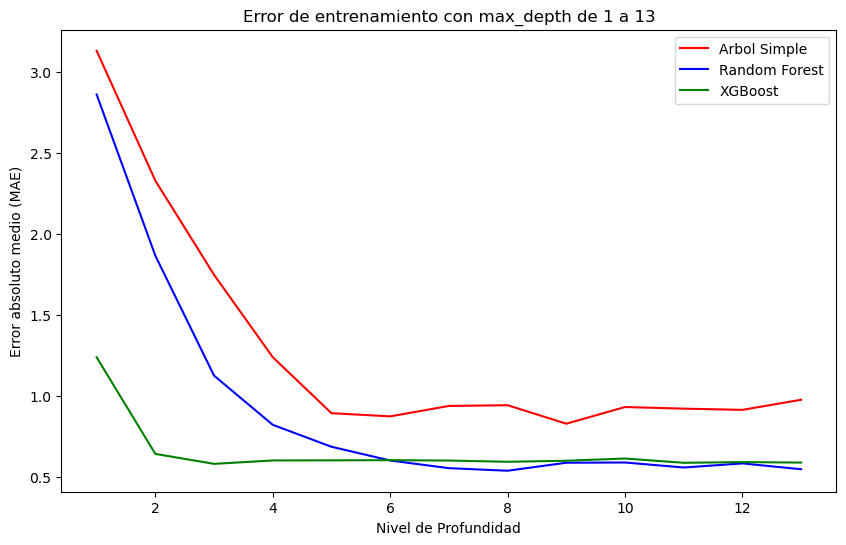

In [49]:
# Entregar el modelo con un arbol simple, un random forest y boosting. comparar cual es mejor
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame e inicializar variables
df = pd.read_csv("Advertising.csv")
porcentaje = 0.8  # 80%
n_estimators_values = [50, 100, 150, 200, 250]

# Hacer corte en los datos
df_train = df.sample(frac=porcentaje)
df_test = df.drop(df_train.index)

# Definir variables predictoras y target
X_train = df_train.drop('sales', axis=1)
y_train = df_train['sales']

X_test = df_test.drop('sales', axis=1)
y_test = df_test['sales']

# Calcular el error de entrenamiento con max_depth de 1 a 13 con los 3 metodos y guardarlos en un DataFrame
resultados_test_arbol_simple = []
resultados_test_rf = []
resultados_test_xgboost = []
for i in range(1, 14):
    arbol = DecisionTreeRegressor(max_depth=i)
    arbol.fit(X_train, y_train)
    y_pred_test = arbol.predict(X_test)
    error_test = y_pred_test - y_test
    mae_test = error_test.abs().mean()
    resultados_test_arbol_simple.append({'Max_Depth': i, 'MAE': mae_test})

    for j in n_estimators_values:
        # Random Forest
        rf = RandomForestRegressor(n_estimators=j, max_depth=i)
        rf.fit(X_train, y_train)
        y_pred_test_rf = rf.predict(X_test)
        error_test_rf = y_pred_test_rf - y_test
        mae_test_rf = error_test_rf.abs().mean()
        resultados_test_rf.append({'n_estimators': j, 'Max_Depth': i, 'MAE': mae_test_rf})

        # Boosting
        xgboost = XGBRegressor(n_estimators=j, max_depth=i)
        xgboost.fit(X_train, y_train)
        y_pred_test_xgboost = xgboost.predict(X_test)
        error_test_xgboost = y_pred_test_xgboost - y_test
        mae_test_xgboost = error_test_xgboost.abs().mean()
        resultados_test_xgboost.append({'n_estimators': j, 'Max_Depth': i, 'MAE': mae_test_xgboost})

# Convertir listas a DataFrame
df_mae_test_rf = pd.DataFrame(resultados_test_rf)
df_mae_test = pd.DataFrame(resultados_test_arbol_simple)
df_mae_test_xgboost = pd.DataFrame(resultados_test_xgboost)

# Encontrar el valor mínimo de MAE (mejor) para cada max_depth
mejores_n_estimators_por_depth = df_mae_test_rf.groupby('Max_Depth')['MAE'].idxmin()
mejores_n_estimators_por_depth_xgboost = df_mae_test_xgboost.groupby('Max_Depth')['MAE'].idxmin()

# Filtrar los resultados de Random Forest para obtener solo el mejor valor de n_estimators por max_depth
mejores_resultados_rf = df_mae_test_rf.loc[mejores_n_estimators_por_depth]
mejores_resultados_xgboost = df_mae_test_xgboost.loc[mejores_n_estimators_por_depth_xgboost]

# Crear un nuevo DataFrame con los resultados de Random Forest y XGBoost para el mejor n_estimators por max_depth
df_mejores_resultados_rf = mejores_resultados_rf[['Max_Depth', 'MAE', 'n_estimators']]
df_mejores_resultados_xgboost = mejores_resultados_xgboost[['Max_Depth', 'MAE', 'n_estimators']]

# Crear la gráfica utilizando seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mae_test, x='Max_Depth', y='MAE', color='red', label='Arbol Simple')
sns.lineplot(data=df_mejores_resultados_rf, x='Max_Depth', y='MAE', color='blue', label='Random Forest')
sns.lineplot(data=df_mejores_resultados_xgboost, x='Max_Depth', y='MAE', color='green', label='XGBoost')
plt.title('Error de entrenamiento con max_depth de 1 a 13')
plt.xlabel('Nivel de Profundidad')
plt.ylabel('Error absoluto medio (MAE)')
plt.show()